# Исследование данных о продажах игр, для выявления факторов, влияющих на успешность игры

Разнообразие платформ, жанров, разные целевые аудитории и успешные продукты, чьи продажи могут доходить до нескольких миллионов копий, все это - игровая индустрия. Нам, как и любому бизнесу, важно делать прогнозы на предстоящий год для успешного планирования бизнес-стратегии

**Цель исследования**
 1. Выявить закономерности и тенденции, определяющие успешность игры
 2. Составить портрет пользователя для Северной Америки, Европы и Японии
 3. Проверить гипотезы:
  * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  * Средние пользовательские рейтинги жанров Action и Sports разные
  
**Ход исследования**

 - Данные для анализа(`games.csv`) получены из открытых источников, поэтому сначала нужно будет  их проверить.
 - После этого, попробуем исправить ошибки, пропуски и неточности
 - Затем заняться анализом данных
 - И проверить гипотезы

## Знакомство с данными

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [214]:
df = pd.read_csv('games.csv')
df_shape_old = df.shape[0]

In [215]:
def get_info(dataframe):
    print('Общая информация')
    display(dataframe.info())
    print('Первые строчки датасета')
    display(dataframe.head())
    print('Общая информация о числовых значениях')
    display(dataframe.describe())
    print('Пропуски')
    display(dataframe.isna().sum())
    print('Одинаковых строк:', dataframe.duplicated().sum())
    print('Всего строк:', dataframe.shape[0])

In [216]:
get_info(df)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Первые строчки датасета


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информация о числовых значениях


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Пропуски


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Одинаковых строк: 0
Всего строк: 16715


***
**После знакомства с данными узнали:**

В нашем распоряжении набор данных о продаже различных игр с 1980 по 2016 год в виде таблицы из 16715 строк. А каждая строчка в свою очередь состоит из:

* Name — названия игры
* Platform — платформы
* Year_of_Release — года выпуска
* Genre — жанра игры
* NA_sales — продаж в Северной Америке (миллионы проданных копий)
* EU_sales — продаж в Европе (миллионы проданных копий)
* JP_sales — продаж в Японии (миллионы проданных копий)
* Other_sales — продаж в других странах (миллионы проданных копий)
* Critic_Score — оценки критиков (максимум 100)
* User_Score — оценки пользователей (максимум 10)
* Rating — рейтинга от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

А еще, есть пропуски в некоторых столбцах, например, не у всех игр есть рейтинг пользователей(самих игроков) или критиков

## Предобработка данных

Для удобства приведем названия столбцов к нижнему регистру

In [217]:
df.columns = df.columns.str.lower()

### Обработка пропусков

У нас есть пропуски в 6 столбцах:

`name` - отсутсвующее название игры заполнить не получится, можно удалить такие строки, так как их всего 2

`year_of_release` - заполнить средним или медианой тоже не выйдет. Таких строк мало, примерно 1,5%, удалим

`genre` - мало строк, можно удалить

`critic_score`, `user_score` - возможно, рейтинг отсутствует, если у игры слишком мало оценок или она была отменена. Если заполнить пропуски нулевым значением, средним или медианой, то можно исказить статистику. А если совсем убрать - потеряем слишком много данных, и результаты, опять же, могут исказиться

`rating` - рейтинг ESRB предназначен для маркировки игр США и Канады, логично, что если игра выпущена для отличного от этих стран рынка, маркировки не будет. Поэтому, заменим пропуски на `unmarked` (нет маркировки)

In [218]:
df = df.dropna(subset=['name', 'year_of_release', 'genre'])
df['rating'] = df['rating'].fillna('unmarked')
df.reset_index(drop=True, inplace=True)

### Изменение типов данных

Изменить тип данных можно в колонке `year_of_release` на целое число. Посмотреть, почему данные в колонке `user_score` типа *object* и, если нужно, поменять

In [219]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [220]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Nan - это отсутсвие значения, тут все в порядке, а вот с "tbd" надо разобраться. Поиск в сети дает такой ответ: ["to be determined"](https://www.metacritic.com/faq#item13), то есть, подлежит уточнению(например, если у игры менее 4 отзывов). А для нас это равнозначно отсутсвию, поэтому заменю на пустое значение. После этого можно привести данные столбца к типу *float*

In [221]:
df['user_score'] = df['user_score'].replace('tbd', None)
df['user_score'] = df['user_score'].astype(float)

### Добавление столбцов

Для удобства добавим столбец `total_sales` - это суммарные продажи игры со всех регионов

In [222]:
cols_to_sum = ['na_sales','eu_sales','jp_sales','other_sales']
df['total_sales'] = df[cols_to_sum].sum(axis=1)

### Подытог предобработки

In [223]:
get_info(df)
print('Осталось данных:', "{:.1%}".format(df.shape[0] / df_shape_old))

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


None

Первые строчки датасета


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unmarked,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unmarked,31.38


Общая информация о числовых значениях


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Пропуски


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

Одинаковых строк: 0
Всего строк: 16444
Осталось данных: 98.4%


***
В этой части мы избавились от пропусков там, где это возможно. Например, если нам был неизвестен год выпуска игры, то такую строчку мы удаляли, потому что это слишком важный параметр для оценки, чтобы не брать его в расчет. Еще добавили новый столбец с общей суммой проданых копий и привели тип данных в столбцах к более удобному виду

## Исследовательский анализ данных

### Количество вышедших игр по годам

Посмотрим на игровую индустрию в целом - узнаем, сколько игр выходило в разные годы

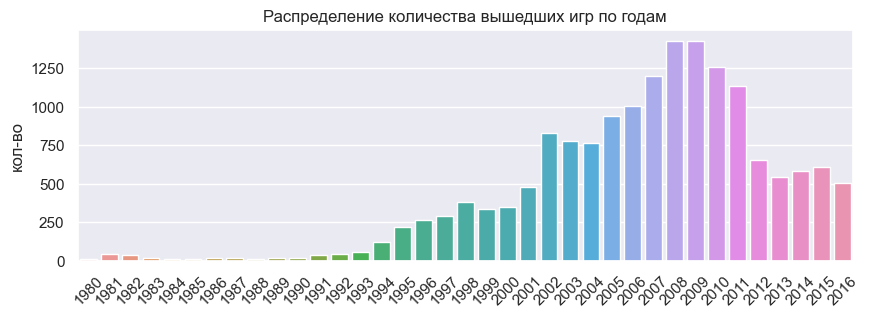

In [224]:
df_years = df['year_of_release'].value_counts().reset_index()
df_years.columns = ['year', 'counts']
df_years = df_years.sort_values('year')
plt.figure(figsize=(10, 3))
sns.set_theme()
sns.barplot(df_years, x='year', y='counts')
plt.xticks(rotation=45)
plt.title('Распределение количества вышедших игр по годам')
plt.xlabel('')
plt.ylabel('кол-во')
plt.show()

Можно сказать, что серьезные обороты игровая индустрия стала стремительно набирать с 90-х годов. А вот с 2012 года количество игр сократилось почти вдвое. Впрочем, это не означает, что сократилась выручка - возможно, игры стали просто дороже  
Из-за динамичности рынка, анализировать будем 3 последние года (2014-2016)

### Анализ лидирующих платформ

Один из вопросов при выпуске игры: "Сделать игру для компьтера или для приставки? А если для приставки, то для какой?"

Поэтому посмотрим на продажи различных платформ

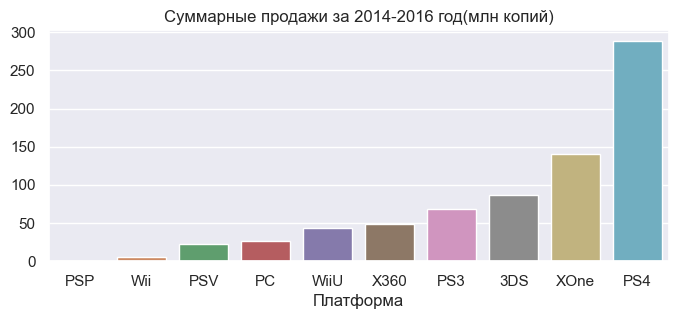

In [225]:
df_last_years = df.query('year_of_release >= 2014')
df_sum_sales = (
    df_last_years
    .groupby('platform')['total_sales']
    .sum()
    .sort_values()
)
plt.figure(figsize=(8, 3))
sns.barplot(x=df_sum_sales.index, y=df_sum_sales)
plt.xlabel('Платформа')
plt.ylabel('')
plt.xticks(rotation=0)
plt.title('Суммарные продажи за 2014-2016 год(млн копий)')
plt.show()

PS4, XOne и 3DS явно лидируют, но посмотрим еще динамику платформ за взятые нами 3 года

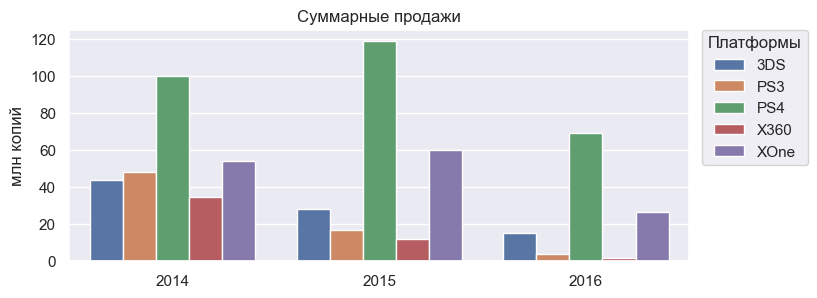

In [226]:
top_platform = ['X360', 'PS3', '3DS', 'XOne', 'PS4']
df_top_platform_sales = (
    df_last_years.query('platform in @top_platform')
    .pivot_table(index='year_of_release', columns='platform', 
                 values='total_sales', aggfunc='sum'))
df_top_platform_sales = df_top_platform_sales.melt(ignore_index=False)

plt.figure(figsize=(8, 3))
sns.barplot(df_top_platform_sales, x=df_top_platform_sales.index, y='value', hue='platform')
plt.xlabel('')
plt.ylabel('млн копий')
plt.xticks(rotation=0)
plt.legend(title='Платформы', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Суммарные продажи')
plt.show()

За последние годы объем продукции на игровом рынке снижается(что мы видели на самом первом графике). Время PS3 и X360 явно подошло к концу - логично, их вытеснили их же более новые версии. У 3DS тоже снижаются продажи, но она все равно еще остается актуальной платформой для игр. **Поэтому, ключевыми платформами будем считать PS4, XOne и 3DS**

Посмотрим на распределение глобальных продаж игр по нашим ключевым платформам

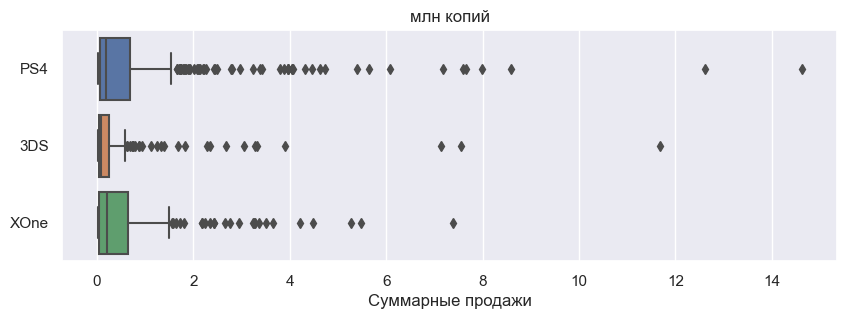

In [227]:
top_platform = top_platform[-3:]
df_top3 = df_last_years.query('platform in @top_platform')
plt.figure(figsize=(10, 3))
sns.boxplot(x='total_sales', y='platform', data=df_top3, orient='h')
plt.xlabel('Суммарные продажи')
plt.ylabel('')
plt.title('млн копий')
plt.show()

Из-за выбросов сложно что-то сказать. А сами выбросы - скорее всего игры, которые получили большой успех, соответсвенно, продались очень большим тиражом

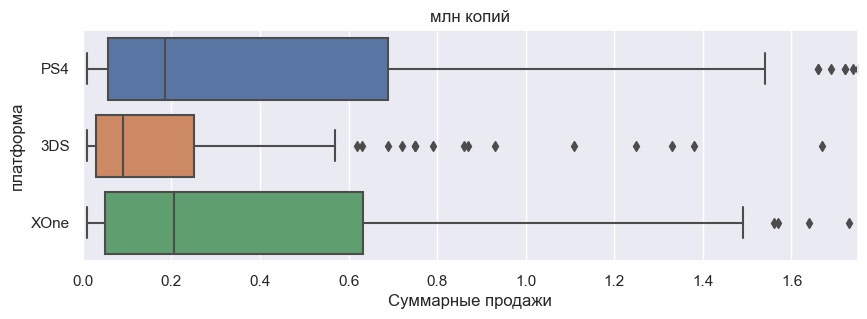

In [228]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='total_sales', y='platform', data=df_top3, orient='h')
plt.xlim(0, 1.75)
plt.xlabel('Суммарные продажи')
plt.ylabel('платформа')
plt.title('млн копий')
plt.show()

Вот так лучше. Видно, что средняя продаваемость игр у Xbox One и PS4 выше, чем у 3DS. Распределение продаж игр у PS4 и XOne на удивление почти одинаковы, хотя PS4 и продает почти в 2 раза больше копий в целом. Если сильно повезет, на этих платформах продажи могут быть до 1,5 млн копий, а вот у 3DS всего примерно до 300 тысяч

### Влияние отзывов на продажи игры

Теперь посмотрим, как на успешность игры влияют отзывы критиков и игроков. Платформу возьмем PS4, как самую большую по объемам продаж
***
(Напомню, коэффициент корреляции может принмать значения от -1 до 1. 1 - сильная прямая зависимость, 0 - совсем нет зависимости(или она нелинейна), -1 - сильная обратная зависимость

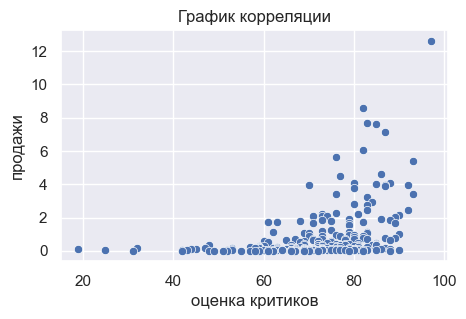

Корреляция: 0.40


In [229]:
df_one_platform = df_top3.query('platform == "PS4"')
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_one_platform, x='critic_score', y='total_sales')
plt.title('График корреляции')
plt.xlabel('оценка критиков')
plt.ylabel('продажи')
plt.show()
print(
    'Корреляция:', '{:.2f}'.format(
        df_one_platform['total_sales']
        .corr(df_one_platform['critic_score']))
)

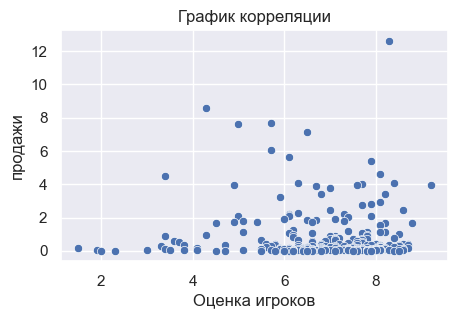

Корреляция: -0.04


In [230]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_one_platform, x='user_score', y='total_sales')
plt.title('График корреляции')
plt.xlabel('Оценка игроков')
plt.ylabel('продажи')
plt.show()
print(
    'Корреляция:', '{:.2f}'.format(
        df_one_platform['total_sales']
        .corr(df_one_platform['user_score']))
)

И все тоже самое для платформы Xbox One - интересно сравнить с результатами PS4

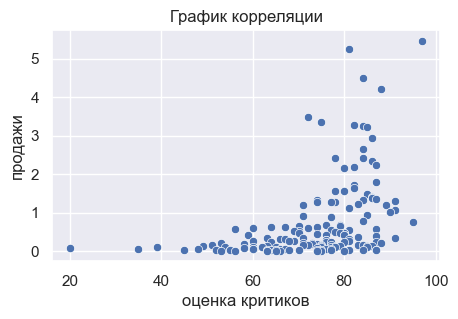

Корреляция: 0.43


In [231]:
df_one_platform = df_top3.query('platform == "XOne"')
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_one_platform, x='critic_score', y='total_sales')
plt.title('График корреляции')
plt.xlabel('оценка критиков')
plt.ylabel('продажи')
plt.show()
print(
    'Корреляция:', '{:.2f}'.format(
        df_one_platform['total_sales']
        .corr(df_one_platform['critic_score']))
)

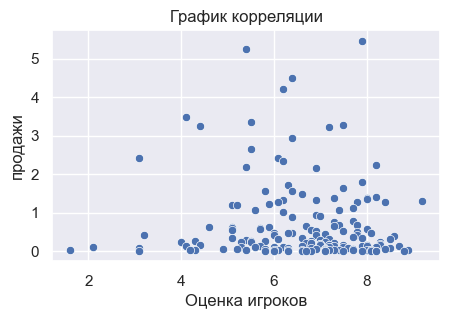

Корреляция: -0.07


In [232]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_one_platform, x='user_score', y='total_sales')
plt.title('График корреляции')
plt.xlabel('Оценка игроков')
plt.ylabel('продажи')
plt.show()
print(
    'Корреляция:', '{:.2f}'.format(
        df_one_platform['total_sales']
        .corr(df_one_platform['user_score']))
)

Результаты получились очень интересными, оказалось, оценки критиков слабо влияют на продажи, а оценки пользователей вообще никак не влияют(либо же влияют, но зависимость не линейная, а более сложная). Можно предположить, что игроки редко смотрят на отзывы игры перед покупкой, а если и смотрят, то на отзывы критиков

### Исследование игр в разрезе жанров

Следующий вопрос, который возникнет при выпуске игры: "А какого жанра будет игра?". Взглянем на суммарный объем продаж игр по жанрам

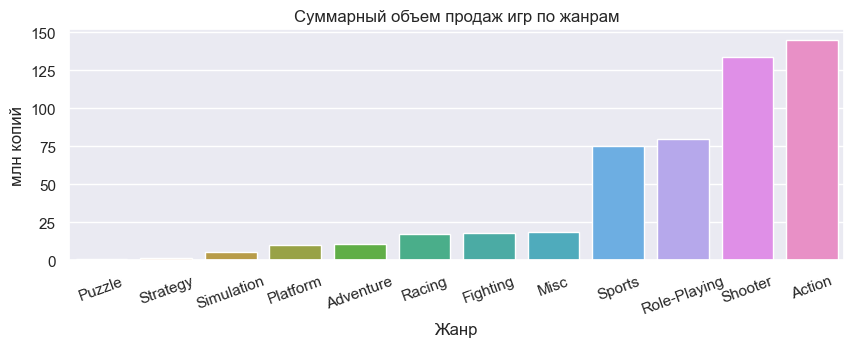

In [233]:
plt.figure(figsize=(10, 3))
df_temp = df_top3.groupby('genre').sum().sort_values(by='total_sales')
df_temp.reset_index(inplace=True)
sns.barplot(data=df_temp, x='genre', y='total_sales')
plt.xticks(rotation=20)
plt.xlabel('Жанр')
plt.ylabel('млн копий')
plt.title('Суммарный объем продаж игр по жанрам')
plt.show()

И еще посмотрим на средний объем продаж для каждого жанра

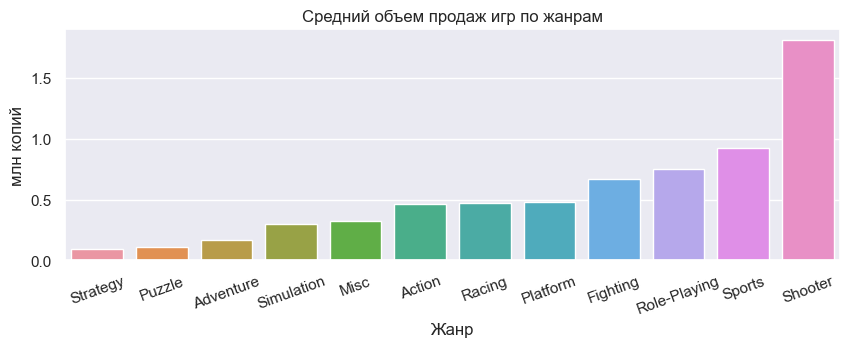

In [234]:
df_temp = (
    df_top3
    .groupby('genre')
    . mean(numeric_only=True)
    .sort_values(by='total_sales')
)
df_temp.reset_index(inplace=True)
plt.figure(figsize=(10, 3))
sns.barplot(data=df_temp, x='genre', y='total_sales')
plt.xticks(rotation=20)
plt.xlabel('Жанр')
plt.ylabel('млн копий')
plt.title('Средний объем продаж игр по жанрам')
plt.show()

**Вывод**

Игры жанра "Shooter" несомненно являются лидерами по обьему продаж. А вот у игр жанра "Action", на первый взягляд, тоже большой обьем продаж, но продажи одной игры этого жанра достаточно низкие. О чем это может говорить? Возможно, игр этого жанра стало слишком много на рынке и они уже не так интересны пользователям

### Портрет пользователя различных регионов

Выпуская игру на различные рынки, стоит учитывать, что целевая аудитория этих рынков тоже может быть разной. Ранее, мы изучили общие тенденции игровой индустрии за последние несколько лет. Теперь детально посмотрим на различные рынки и составим портрет пользователя для Северной Америки, Европы и Японии

Посмотрим, как между собой поделили рынок пять самых популярных платформ

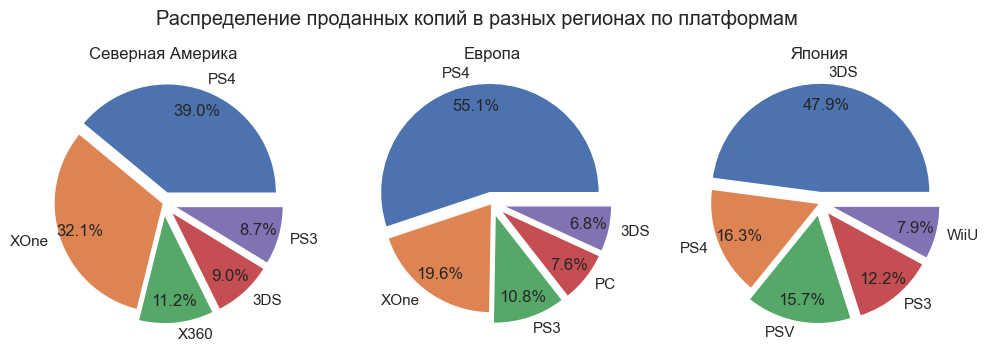

In [235]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
titles = ['Северная Америка', 'Европа', 'Япония']
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Распределение проданных копий в разных регионах по платформам')

for i in range(0, 3):
    vals = (
        df_last_years.groupby('platform')[regions[i]]
        .sum().sort_values(ascending=False)
        .head(5).values
    )
    labels = (
        df_last_years.groupby('platform')[regions[i]]
        .sum().sort_values(ascending=False)
        .head(5).index.values
    )
    axs[i].pie(
        vals, labels=labels, explode=(0.1, 0, 0.1, 0.1, 0.1), 
        autopct='%.1f%%', pctdistance=0.8)
    axs[i].set_title(titles[i])

Если для Северной Америки и Европы самая популярная платформа PS4(что соответсвует общему тренду), то для Японии это 3DS. Также можно заметить, что только в Японии же в топ 5 попала PSV, а XOne наоборот, не вошла в пятерку лидеров. А еще видно, что в Северной Америке доля платформ от Microsoft(X360 и XOne) самая большая

А теперь все тоже самое, но разделение будет по топ 5 жанрам. Брать будем не суммарные продажи, а медиану

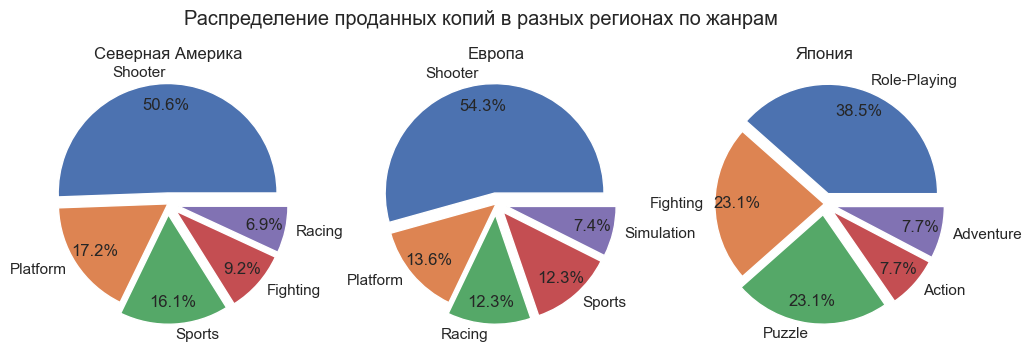

In [236]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Распределение проданных копий в разных регионах по жанрам')

for i in range(0, 3):
    vals = (
        df_last_years.groupby('genre')[regions[i]].median()
        .sort_values(ascending=False).head(5).values * 10
    )
    labels = (
        df_last_years.groupby('genre')[regions[i]].median()
        .sort_values(ascending=False).head(5).index.values
    )
    axs[i].pie(vals, labels=labels, explode=(0.1, 0, 0.1, 0.1, 0.1), 
               autopct='%.1f%%', pctdistance=0.8)
    axs[i].set_title(titles[i])

Тут тоже видны различия, особенно, в регионе Япония, там самые популярные жанры - Role-Playing и Fighting

Тогда, стоит взглянуть и на рейтинг ESRB(возрастная категория)

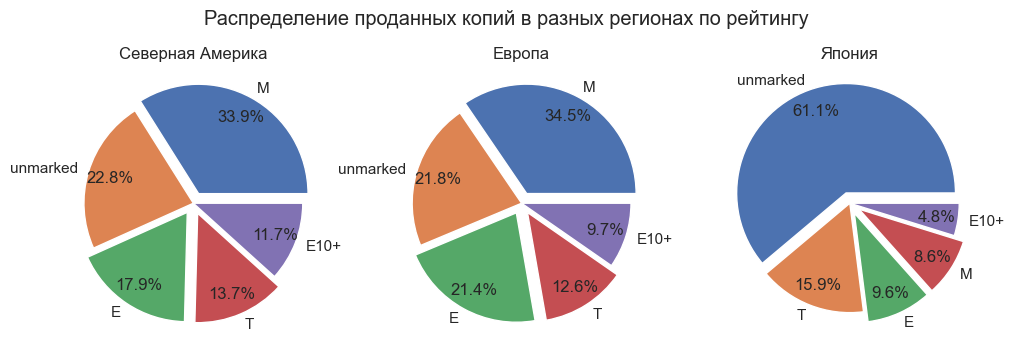

In [237]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Распределение проданных копий в разных регионах по рейтингу')

for i in range(0, 3):
    vals = (
        df_last_years.groupby('rating')[regions[i]]
        .sum().sort_values(ascending=False).values
    )
    labels = (
        df_last_years.groupby('rating')[regions[i]]
        .sum().sort_values(ascending=False).index.values
    )
    axs[i].pie(vals, labels=labels, explode=(0.1, 0, 0.1, 0.1, 0), 
               autopct='%.1f%%', pctdistance=0.8)
    axs[i].set_title(titles[i])

Северная Америка и Европа практически идентичны - самые популярные игры здесь категории М(от 17 лет) и без маркировки. А вот Япония сильно отличается - 2/3 рынка занято играми без маркировки, на втором месте игры категории Т(от 13 лет). Можно предположить, что для пользователей Северной Америки и Европы достаточно важно, чтобы у игры был рейтинг ESRB - без него не все готовы купить игру. А вот для пользователей Японии наличие или отсутсвие маркировки не важно

## Проверка гипотез

Нам была поставлена задача проверить гипотезу, которая звучит так: `"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"`
 - Нулевая гипотеза в нашем случае **Средние пользовательские рейтинги платформ Xbox One равны средним пользовательским рейтингам платформы РС**
 - Альтернативная гипотеза **Средние пользовательские рейтинги платформ Xbox One не равны средним пользовательским рейтингам платформы РС**

In [238]:
xbox_user_score = df_last_years.query(
    'platform == "XOne"')['user_score'].dropna()
pc_user_score = df_last_years.query(
    'platform == "PC"')['user_score'].dropna()
alpha = 0.05
results = st.ttest_ind(xbox_user_score, pc_user_score)

print('p-значение: {:.2f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10
Не получилось отвергнуть нулевую гипотезу


Раз нулевую гипотезу отвергнуть не получилось, значит, она верна и средние пользовательские рейтинги платформ Xbox One и PC действительно одинаковые.

Что такое р-значение, и как его можно интерпертировать: у нас есть вероятность 10% получить такой результат, при котором наша нулевая гипотеза будет ложно отвергнута из-за статистической ошибки. А 10% это слишком много, поэтому мы и не отвергаем нулевую гипотезу 

***
Нам была поставлена задача проверить гипотезу, которая звучит так: `"Средние пользовательские рейтинги жанров Action и Sports разные"`
 - Нулевая гипотеза в нашем случае **Средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports**
 - Альтернативная гипотеза **Средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports**


In [239]:
action_user_score = df_last_years.query(
    'genre == "Action"')['user_score'].dropna()
sports_user_score = df_last_years.query(
    'genre == "Sports"')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(action_user_score, sports_user_score)

print('p-значение: {:.20f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00000000000000000029
Отвергаем нулевую гипотезу


Интерпретируем: вероятность ложно отвергнуть нулевую гипотезу из-за статистической ошибки очень мала. Это меньше стандартного критерия, который равняется 5%, а значит, можем отвергнуть нулевую гипотезу в пользу альтернативной. То есть, средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports

## Итоги

В нашем распоряжении был датасет со статистикой проданных игр по разным регионам.

После обработки датасета у нас осталось 98.4% данных, а значит, он остался достаточно репрезентативным.

 **Тенденции и закономерности, определляющие успешность продукта**
 
При исследовании игрового рынка мы узнали, что он постоянно меняется: в среднем каждый год появляется новая платформа для игр, а жизненный ее цикл составляет около 7 лет. В связи с этим, при исследовании тенденций, актуальным периодом для анализа были выбраны последние 3 года. Лидирующей платформой оказалась PS4, следующей по популярности XOne и замыкает тройку 3DS. Но, 3DS показывает стабильное снижение продаж за последние несколько лет, что может говорить о том, что жизненный цикл этой платформы подходит к концу. Еще важно отметить, что, несмотря на лидирующий обьем продаж у PS4, средняя продаваемость игры(в млн копий) такая же, как и на платформе XOne
 
При исследовании успешности жанров на рынке игр узнали, что игры жанра "Shooter" являются лидерами как по обьему продаж, так и по средней продаваемости одной игры такого жанра. А вот у игр жанра "Action", на первый взягляд, тоже большой обьем продаж, но продажи одной игры этого жанра в среднем низкие. О чем это может говорить? Возможно, игр этого жанра стало слишком много на рынке и они уже не так интересны пользователям. Возможно, популярными жанрами в следующем году будут также "Sports" и "Platform" - у них маленькие суммарные продажи и высокая медиана продаж.

**Влияние оценок на продажи игр**

Было проведено исследование корреляции между продажами игры и ее оценками как пользователями, так и критиками. Получили схожие результаты при взятии двух разных платформ за актуальный период.
 * Корреляция продаж и отзывов критиков в среднем для двух платформ: 0.3935(слабая связь)
 * Корреляция продаж и отзывов пользователей в среднем для двух платформ: -0.12(отсутсвие связи, либо нелинейность)
 
 Что говорит о том, что большинство пользователей редко смотрят отзывы перед покупкой, либо же не ориентируются на них. При этом, малая часть все же обращает свое внимание на отзывы, но больше на отзывы критиков

**Портрет покупателя**

Также были выявлены отличия и составлены профили покупателей различных игровых рынков, а именно: Северная Америка, Европа и Япония
 - Для Северной Америке самые популярные платформы - это PS4, XOne и 3DS, соответсвенно. Жанры - Shooter, Platform и Sports.
 - Для Европы самые популярные платформы - это PS4, XOne и PS3, соответсвенно. Жанры - Shooter, Platform и Racing.
 
 Если эти два региона были схожи, то регион Япония разительно отличается
 - Для Японии самые популярные платформы - это 3DS, PS4 и PSV, соответсвенно. И совсем другие жанры - Role-Playing, Fighting и Puzzle.
 
А еще узнали, что пользователи Северной Америки и Европы с гораздо меньшей вероятностью приобретут игру без маркировки ESRB, в отличии от пользователей из Японии(там 2/3 рынка - это игры без маркировки)
 
 **Проверка гипотез**
 
 Также, была проведена проверка гипотез: `"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"` и `"Средние пользовательские рейтинги жанров Action и Sports разные"`. Обе гипотезы подтвердились

**Резюмируя**

 Самой популярной платформой на следующий год прогнозируются PS4, уступать ей в продажах будет XOne. Также вероятно, что 3DS завершит свой цикл существования, и появится новая платформа. Вероятно, популярными жанрами будут Shooter, Sports и Platform. А также, при планировании продукта обязательно стоит учитывать региональные отличия пользователей